## 1.导入数据

In [1]:
# 导入库
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
# 导入数据集
mat = sio.loadmat('data/ex6data3.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [4]:
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']   # 要分离出交叉验证集

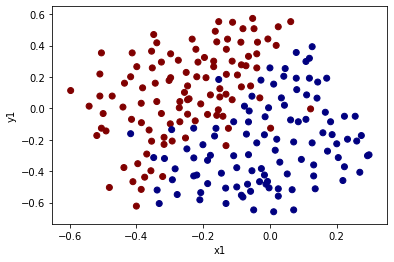

In [8]:
# 画出原始数据图
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(), cmap ='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')
    
plot_data()

## 2.选择C 和 σ 的值（需要使用交叉验证集）

In [9]:
# C 和 σ 的候选值
Cvalues = [3, 10, 30, 100,0.01, 0.03, 0.1, 0.3,1 ]  # 一般是3倍
gammas =  [1 ,3, 10, 30, 100,0.01, 0.03, 0.1, 0.3]  # 一般是3倍

In [10]:
# 获取最佳准确率和最优参数
best_score = 0
best_params = (0,0)

In [16]:
for c in Cvalues:                                       # 遍历所有的C
    for gamma in gammas:                                # 遍历所有的gamma
        svc = SVC(C=c,kernel='rbf',gamma=gamma)
        svc.fit(X,y.flatten())                           # 用训练集数据拟合模型
        score = svc.score(Xval,yval.flatten())           # 用验证集数据进行评分
        if score > best_score:
            best_score = score
            best_params = (c,gamma)

print(best_score , best_params)

0.965 (3, 30)


注意：获取到的最优参数组合不只有一组，更改候选值的顺序，最佳参数组合及其对应的决策边界也会改变

## 3.训练模型

In [17]:
# 用上一步选择好了的参数值训练模型
svc2 = SVC(C=3,kernel='rbf',gamma=30)
svc2.fit(X,y.flatten())

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# 定义绘制决策边界的函数
def plot_boundary(model):
    x_min,x_max = -0.6,0.4
    y_min,y_max = -0.7,0.6
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),
                       np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

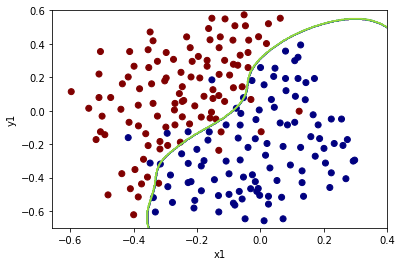

In [19]:
# 绘制决策边界
plot_boundary(svc2)
plot_data()

非常的完美